In [1]:

import os

import pandas as pd
from matplotlib import pyplot as plt
import torch
import numpy as np


In [2]:

path2lkh_result = '/home/shun/work/lkh/result/lkh_20240605.csv'
lkh = pd.read_csv(path2lkh_result)


In [13]:

def curve(n_nodes, run_name, range_x=None, range_y=None):
    optimal = lkh[lkh['n_nodes']==n_nodes]['tour_length'].iloc[0]
    path2log = os.path.join('../checkpoints/', f'tsp_{n_nodes}', run_name, 'log.csv')
    fig, ax = plt.subplots(figsize=(7, 3))
    df = pd.read_csv(path2log)
    df['gap'] = 100 * (df['cost_val']-optimal) / optimal
    ax.plot(df['epoch'], df['gap'])
    
    
#    ax.set_xlim([1, None])
    
    ax.grid()
    ax.set(xlabel='Epoch', ylabel='Gap (%)')
    # ax.set_xscale('log')
    ax.set_yscale('log')
    
    if range_x is not None:
        ax.set_xlim(range_x)
    if range_y is not None:
        ax.set_ylim(range_y)
    plt.show()
    

In [4]:

def loss(n_nodes, run_name, range_x=None, range_y=None):
    path2log = os.path.join('../checkpoints/', f'tsp_{n_nodes}', run_name, 'log.csv')
    fig, ax = plt.subplots(figsize=(7, 3))
    df = pd.read_csv(path2log)
    df['loss_total'] = df['loss_value'] + df['loss_policy']
    ax.plot(df['epoch'], df['loss_policy'], label='Policy')
    ax.plot(df['epoch'], df['loss_value'], label='Value')
    ax.plot(df['epoch'], df['loss_total'], label='Total')
    
    ax.grid()
    ax.set(xlabel='Epoch', ylabel='Loss')
    # ax.set_xscale('log')
    #ax.set_yscale('log')
    
    
    if range_x is not None:
        ax.set_xlim(range_x)
    if range_y is not None:
        ax.set_ylim(range_y)
    ax.legend()
    plt.show()
    

In [162]:

def loss_curve_reward_model(n_nodes, run_name, range_x=None, range_y=None):
    path2log = os.path.join('../checkpoints/', f'tsp_{n_nodes}', run_name, 'reward/log.csv')
    fig, ax = plt.subplots(figsize=(7, 3))
    df = pd.read_csv(path2log)
    ax.plot(df['epoch'], df['loss'])
    
    ax.grid()
    ax.set(xlabel='Epoch', ylabel='Loss')
    # ax.set_xscale('log')
    #ax.set_yscale('log')
    
    
    if range_x is not None:
        ax.set_xlim(range_x)
    if range_y is not None:
        ax.set_ylim(range_y)
    plt.show()



    

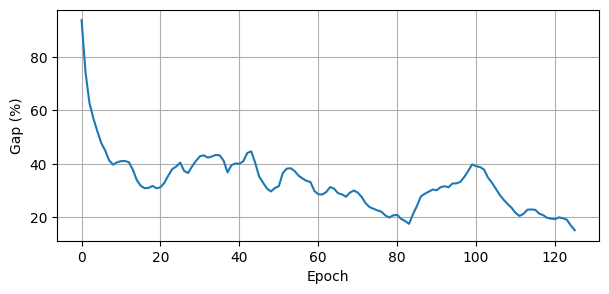

In [163]:

# p train.py --epoch_size 10000 --n_nodes 20 --run_name run0605 --batch_size 1000 --coef_value 1e-3 --epsilon 0.1
n_nodes = 20
curve(n_nodes, 'run0605')


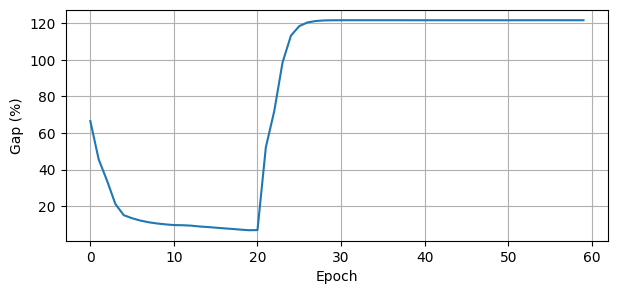

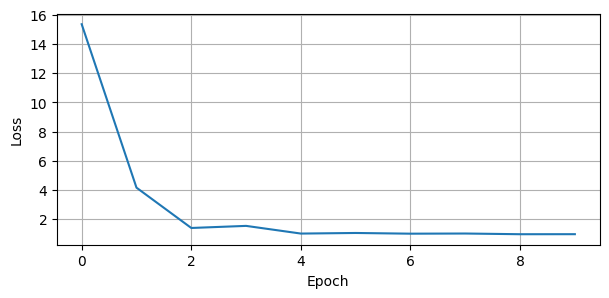

In [176]:
# DPO
# p train.py --epoch_size 10000 --n_nodes 20 --run_name run0619 --batch_size 1000 --n_epochs_policy_only 20 --n_epochs_reward 10 --n_epochs_policy_direct 10
curve(n_nodes, 'run0619')
loss_curve_reward_model(n_nodes, 'run0619')


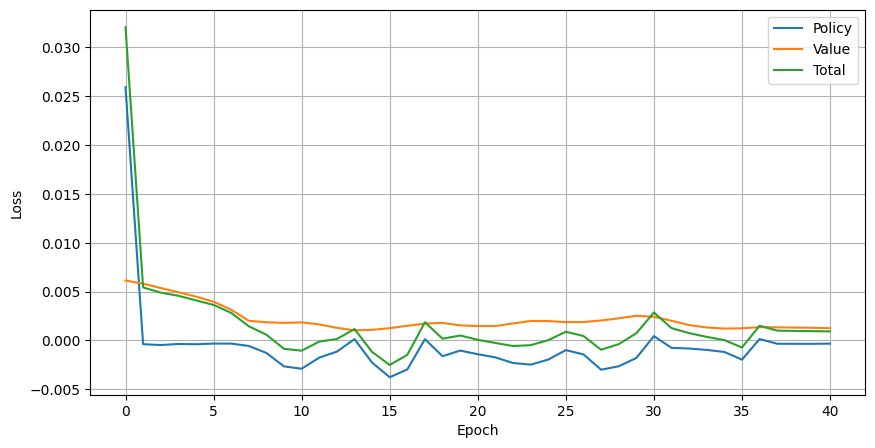

In [108]:

loss(20, 'run0605')#, range_y=[-100, .02])


In [132]:

def see_rewards(n_nodes, run_name):
    epoch_list = [0, 20, 80]
    fig, ax = plt.subplots(figsize=(10, 5))

    for epoch in epoch_list:
        path2csv = os.path.join('..', f'rewards-epoch-{epoch}.csv')
        rewards = np.loadtxt(path2csv)
        ax.plot(list(range(n_nodes+1)), rewards, label=f'{epoch=}')
    
    ax.grid()
    ax.set(xlabel='step', ylabel='Instant reward')
    # ax.set_xscale('log')
    #ax.set_yscale('log')
    
    
    # if range_x is not None:
    #     ax.set_xlim(range_x)
    # if range_y is not None:
    #     ax.set_ylim(range_y)
    ax.legend()
    plt.show()


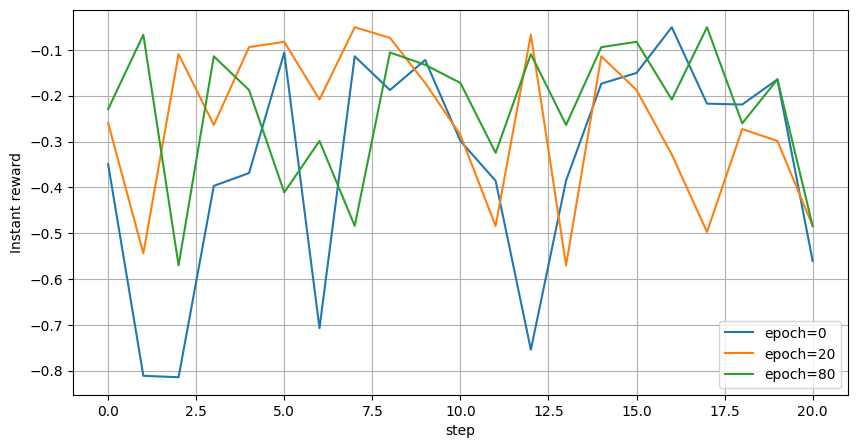

In [133]:

see_rewards(20, 'run0605')


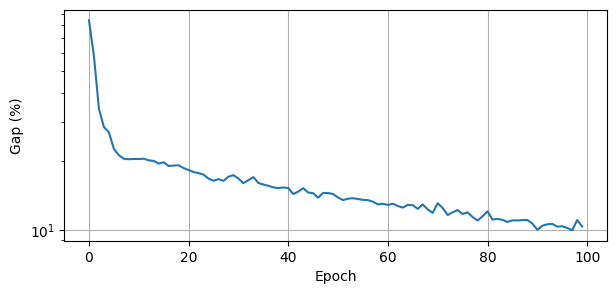

In [14]:
# p train.py --epoch_size 10000 --n_nodes 20 --run_name run0703 --batch_size 1000 --n_rollout 8

curve(20, 'run0703')
# 20 % 10 epoch
